In [2]:
#!pip install pymongo
import pymongo

#Establish Connetion
conn=pymongo.MongoClient("mongodb://127.0.0.1:27017/")

In [3]:
#Connecting to database
cancer_db=conn['Cancer_Database']
print(cancer_db)

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Cancer_Database')


In [4]:
#Checking Database exist or not
if 'Cancer_Database' in conn.list_database_names():
    print("Cancer Database already exist")
else:
    print("Cancer Database does not exist")

Cancer Database already exist


In [5]:
#Creating Collection in database
collect=cancer_db['Lung_Cancer']
print(collect)

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Cancer_Database'), 'Lung_Cancer')


In [5]:
#Loading json file
import json
with open('lung_cancer.json') as file:
    file = json.load(file)
print(file)

[{'Name': 'Wick', 'Member_ID': 91550, 'Diagnosis': 'M', 'Age': 35, 'Smokes': 3, 'Smokes (years)': '0', 'Smokes (packs': {'year)': '0'}, 'AreaQ': 5, 'Alkhol': 4, 'family history': 0, 'Result': 1}, {'Name': 'Constantine', 'Member_ID': 915664, 'Diagnosis': 'M', 'Age': 27, 'Smokes': 20, 'Smokes (years)': '0', 'Smokes (packs': {'year)': '0'}, 'AreaQ': 2, 'Alkhol': 5, 'family history': 0, 'Result': 1}, {'Name': 'Anderson', 'Member_ID': 915691, 'Diagnosis': 'M', 'Age': 30, 'Smokes': 0, 'Smokes (years)': '0', 'Smokes (packs': {'year)': '0'}, 'AreaQ': 5, 'Alkhol': 2, 'family history': 0, 'Result': 0}, {'Name': 'Telles', 'Member_ID': 915940, 'Diagnosis': 'M', 'Age': 28, 'Smokes': 0, 'Smokes (years)': '37', 'Smokes (packs': {'year)': '37'}, 'AreaQ': 8, 'Alkhol': 1, 'family history': 1, 'Result': 0}, {'Name': 'Maradona', 'Member_ID': 91594602, 'Diagnosis': 'M', 'Age': 68, 'Smokes': 4, 'Smokes (years)': '0', 'Smokes (packs': {'year)': '0'}, 'AreaQ': 5, 'Alkhol': 6, 'family history': 0, 'Result': 1}

In [6]:
#Inserting json file in Cancer_Database
if isinstance(file,list):
    collect.insert_many(file)
else:
    collect.insert_one(file)

In [7]:
#Checking 'Lung_cancer' collection exit or not
print(cancer_db.list_collection_names())

['Lung_Cancer']


In [6]:
#Reading data from Cancer_Database 
cancer_mgd=collect.find({},{'_id':False}) #using '_id :False' we are not reading object id created by mongodb, we are reading only json file data

data=[x for x in cancer_mgd]
data

[{'Name': 'Wick',
  'Member_ID': 91550,
  'Diagnosis': 'M',
  'Age': 35,
  'Smokes': 3,
  'Smokes (years)': '0',
  'Smokes (packs': {'year)': '0'},
  'AreaQ': 5,
  'Alkhol': 4,
  'family history': 0,
  'Result': 1},
 {'Name': 'Constantine',
  'Member_ID': 915664,
  'Diagnosis': 'M',
  'Age': 27,
  'Smokes': 20,
  'Smokes (years)': '0',
  'Smokes (packs': {'year)': '0'},
  'AreaQ': 2,
  'Alkhol': 5,
  'family history': 0,
  'Result': 1},
 {'Name': 'Anderson',
  'Member_ID': 915691,
  'Diagnosis': 'M',
  'Age': 30,
  'Smokes': 0,
  'Smokes (years)': '0',
  'Smokes (packs': {'year)': '0'},
  'AreaQ': 5,
  'Alkhol': 2,
  'family history': 0,
  'Result': 0},
 {'Name': 'Telles',
  'Member_ID': 915940,
  'Diagnosis': 'M',
  'Age': 28,
  'Smokes': 0,
  'Smokes (years)': '37',
  'Smokes (packs': {'year)': '37'},
  'AreaQ': 8,
  'Alkhol': 1,
  'family history': 1,
  'Result': 0},
 {'Name': 'Maradona',
  'Member_ID': 91594602,
  'Diagnosis': 'M',
  'Age': 68,
  'Smokes': 4,
  'Smokes (years)': '0

In [1]:
#Establishing connection with mysql
import mysql
import mysql.connector

db=mysql.connector.connect(host="localhost",user="root",passwd="root")


In [2]:
#Creating Database
curs=db.cursor()
try:
    curs.execute("CREATE DATABASE Cancer_mysql")
except:
    print("Database already exist")

Database already exist


In [4]:
#Check database exist or not
curs.execute("SHOW DATABASES")
curs

In [5]:
databases=[x for x in curs]
databases #'cancer_mysql database existed'

[('cancer_mysql',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sys',),
 ('world',)]

In [3]:
#Connecting with caner_mysql database
curs.execute("use cancer_mysql")

In [23]:
#Inserting mongodb data in mysql
# curs.execute('drop table lung_cancer_mysql')
result=curs.execute("create table if not exists lung_cancer_mysql (Name varchar(20),Member_ID int,Diagnosis varchar(2),Age int,Smokes int,Smokes_years varchar(20),Smokes_packs_per_year varchar(20),AreaQ int,Alkhol int,family_history int,Result int)")

In [7]:
#Checking tables exist or not
curs.execute("SHOW TABLES")
tables=[x for x in curs]
tables #'lung_cancer_mysql table existed'

[('breast_cancer_mysql',),
 ('cancer_death_mysql',),
 ('cancer_patients_mysql',),
 ('lung_cancer_mysql',)]

In [25]:
#Inserting data in table
i=0
for x in data:
    Name=x.get('Name')
    Member_ID=x.get('Member_ID')
    Diagnosis=x.get('Diagnosis')
    Age=x.get('Age')
    Smokes=x.get('Smokes')
    Smokes_years=x.get('Smokes (years)')
    Smokes_packs_per_year=x.get('Smokes (packs').get('year)')
    AreaQ=x.get('AreaQ')
    Alkhol=x.get('Alkhol')
    family_history=x.get('family history')
    Result=x.get('Result')
    sql = "INSERT INTO lung_cancer_mysql (Name,Member_ID,Diagnosis,Age,Smokes,Smokes_years,Smokes_packs_per_year,AreaQ,Alkhol,family_history,Result) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    val = (Name,Member_ID,Diagnosis,Age,Smokes,Smokes_years,Smokes_packs_per_year,AreaQ,Alkhol,family_history,Result)
    curs.execute(sql, val)
    i+=1
db.commit()

In [4]:
#Reading data from mysql
curs.execute('select * from lung_cancer_mysql')
lung_db=[x for x in curs]
db.close()       #Closing of database connection

In [170]:
#Using dataframe we can do analysis 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
lung_cancer=pd.DataFrame(lung_db,columns=['Name','Member_ID','Diagnosis','Age','Smokes','Smokes_years','Smokes_packs_per_year','AreaQ','Alkhol','family_history','Result'])

In [171]:
lung_cancer.head(10)

,Name,Member_ID,Diagnosis,Age,Smokes,Smokes_years,Smokes_packs_per_year,AreaQ,Alkhol,family_history,Result
0,Wick,91550,M,35,3,0,0,5,4,0,1
1,Constantine,915664,M,27,20,0,0,2,5,0,1
2,Anderson,915691,M,30,0,0,0,5,2,0,0
3,Telles,915940,M,28,0,37,37,8,1,1,0
4,Maradona,91594602,M,68,4,0,0,5,6,0,1
5,Ronaldo,916221,M,34,0,0,0,10,0,0,0
6,Tal,916799,M,58,15,34,3.4,10,0,0,0
7,Bates,916838,M,22,12,0,0,5,2,1,0
8,Kidman,917062,M,45,2,0,0,6,0,1,0
9,Milland,917080,M,52,18,1.266972909,2.8,4,5,0,1


In [172]:
lung_cancer.shape

(1298, 11)

In [173]:
lung_cancer.describe()

,Member_ID,Age,Smokes,AreaQ,Alkhol,family_history,Result
count,1.298000e+03,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000
mean,2.785475e+07,42.627119,15.067797,5.203390,3.237288,0.457627,0.474576
std,1.175880e+08,16.103260,7.919703,2.441972,2.361167,0.498393,0.499546
min,8.670000e+03,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.735860e+05,28.000000,10.000000,3.000000,1.000000,0.000000,0.000000
50%,9.125190e+05,39.000000,15.000000,5.000000,3.000000,0.000000,0.000000
75%,8.810436e+06,55.000000,20.000000,8.000000,5.000000,1.000000,1.000000
max,9.113205e+08,77.000000,34.000000,10.000000,8.000000,1.000000,1.000000


In [174]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1298 non-null   object
 1   Member_ID              1298 non-null   int64 
 2   Diagnosis              1298 non-null   object
 3   Age                    1298 non-null   int64 
 4   Smokes                 1298 non-null   int64 
 5   Smokes_years           1298 non-null   object
 6   Smokes_packs_per_year  1298 non-null   object
 7   AreaQ                  1298 non-null   int64 
 8   Alkhol                 1298 non-null   int64 
 9   family_history         1298 non-null   int64 
 10  Result                 1298 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 111.7+ KB


### Dividing dataset into numerical and categorical

In [175]:
#Categorical Data
lung_cancer_cat=lung_cancer.select_dtypes(include='object')

In [176]:
lung_cancer_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1298 non-null   object
 1   Diagnosis              1298 non-null   object
 2   Smokes_years           1298 non-null   object
 3   Smokes_packs_per_year  1298 non-null   object
dtypes: object(4)
memory usage: 40.7+ KB


In [177]:
#Numerical Data
lung_cancer_num=lung_cancer.select_dtypes(include='number')

In [178]:
lung_cancer_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Member_ID       1298 non-null   int64
 1   Age             1298 non-null   int64
 2   Smokes          1298 non-null   int64
 3   AreaQ           1298 non-null   int64
 4   Alkhol          1298 non-null   int64
 5   family_history  1298 non-null   int64
 6   Result          1298 non-null   int64
dtypes: int64(7)
memory usage: 71.1 KB


<AxesSubplot:>

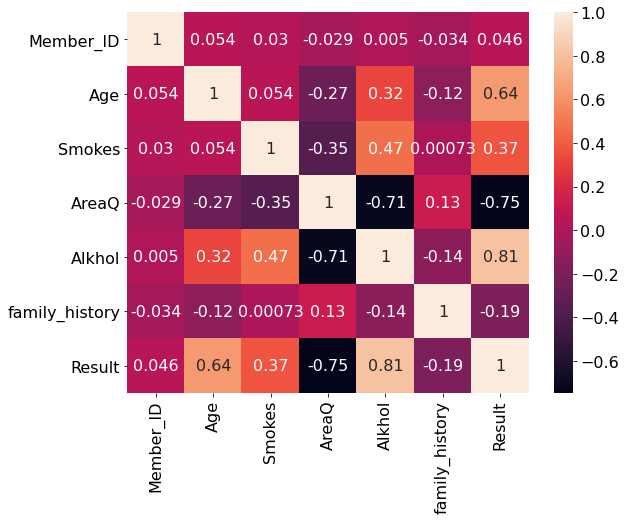

In [184]:
#Correltion between numerical variables
plt.figure(figsize=(9,7))
sns.heatmap(lung_cancer_num.corr(),annot=True)

In [185]:
#Checking how many unique values present in each columns of numerical datasets
z=pd.DataFrame(lung_cancer_num.apply(lambda x: x.value_counts().count()))
z.columns=['unique_values']
z

,unique_values
Member_ID,569
Age,37
Smokes,16
AreaQ,10
Alkhol,9
family_history,2
Result,2


In [186]:
# from above we can say that features AreaQ,Alkhol,family_history and Result should be categorical because there unique values are less than 10.
y=z.loc[z['unique_values']<=10]
ls=y.index
#converting to categorigal form
cat=lung_cancer_num.loc[:,ls].astype('object')
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AreaQ           1298 non-null   object
 1   Alkhol          1298 non-null   object
 2   family_history  1298 non-null   object
 3   Result          1298 non-null   object
dtypes: object(4)
memory usage: 40.7+ KB


In [187]:
lung_cancer_cat=pd.concat([lung_cancer_cat,cat],axis=1,join='inner')
lung_cancer_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1298 non-null   object
 1   Diagnosis              1298 non-null   object
 2   Smokes_years           1298 non-null   object
 3   Smokes_packs_per_year  1298 non-null   object
 4   AreaQ                  1298 non-null   object
 5   Alkhol                 1298 non-null   object
 6   family_history         1298 non-null   object
 7   Result                 1298 non-null   object
dtypes: object(8)
memory usage: 81.2+ KB


In [188]:
slice2=z.loc[z['unique_values']>10]
num=slice2.index
lung_cancer_num=lung_cancer_num.loc[:,num]
lung_cancer_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Member_ID  1298 non-null   int64
 1   Age        1298 non-null   int64
 2   Smokes     1298 non-null   int64
dtypes: int64(3)
memory usage: 30.5 KB


### Univariate Analysis on Numerical Dataset

In [192]:
#Checking null or missing values in dataset
lung_cancer_num.isnull().sum()

Member_ID    0
Age          0
Smokes       0
dtype: int64

In [193]:
lung_cancer_num.isna().sum()

Member_ID    0
Age          0
Smokes       0
dtype: int64

In [194]:
#Some columns contain '?'
lung_cancer_num.isin(['?']).sum() # Impuation of varible is not required no value is mising for numerical dataset

Member_ID    0
Age          0
Smokes       0
dtype: int64

In [195]:
#Outlier prediction is not required because numerical dataset contain one numerical variable i.e Smoke.
#Whereas Member_ID and Age is not use for prediction.We can drop this columns also.

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

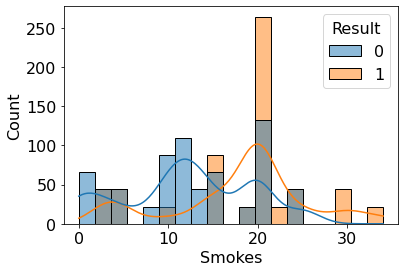

In [197]:
# #Showing the relation between smoking person and cancer result
sns.histplot(data=lung_cancer,x='Smokes',hue='Result',stat='count',kde='true')
plt.show()

### Bivariate Analysis on Numerical Dataset

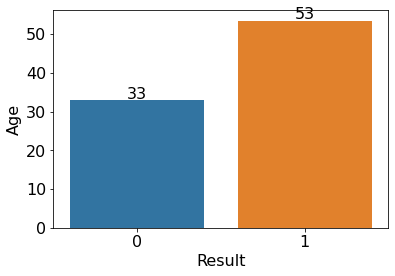

In [198]:
# #Showing the relation between smoking person and cancer result
ax=sns.barplot(x='Result',y='Age',data=lung_cancer,ci=0)
# label each bar in barplot
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height+0.5, s = '{:.0f}'.format(height),ha = 'center')
plt.show()

In [199]:
labels=['young','Adult','Old']
bins=[0,18,50,100]
lung_cancer_num['Age_Rank']=pd.cut(lung_cancer_num['Age'],bins=bins,labels=labels)
lung_cancer_num.head()

,Member_ID,Age,Smokes,Age_Rank
0,91550,35,3,Adult
1,915664,27,20,Adult
2,915691,30,0,Adult
3,915940,28,0,Adult
4,91594602,68,4,Old


In [200]:
# Checking no. of smokers belong to which age categories
new=lung_cancer_num[['Age_Rank','Smokes']].groupby(['Age_Rank']).count()
new['Smokes_percentage']=new.apply(lambda x: np.round((x/np.sum(new['Smokes']))*100,2))
new

,Smokes,Smokes_percentage
Age_Rank,,
young,22,1.69
Adult,858,66.10
Old,418,32.20


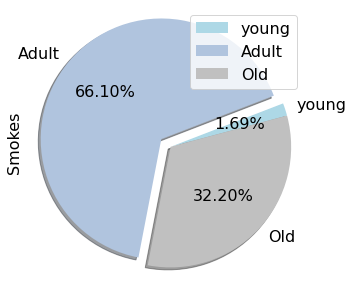

In [201]:
colors = ['lightblue','lightsteelblue','silver']
explode = (0, 0.1, 0)
new.plot.pie(y='Smokes', figsize=(5, 5),autopct='%1.2f%%', startangle=15, shadow = True, colors=colors, explode=explode)
plt.axis('equal')
plt.show()

### Univariate Analysis on Categorical dataset

In [202]:
#checking '?' values
lung_cancer_cat.isin(['?']).sum()

Name                      0
Diagnosis                 0
Smokes_years             22
Smokes_packs_per_year    22
AreaQ                     0
Alkhol                    0
family_history            0
Result                    0
dtype: int64

In [203]:
# Replacing '?' with mode of Smokes_years coluns
y=lung_cancer_cat['Smokes_years'].mode()[0]
lung_cancer_cat.Smokes_years.replace('?',y,inplace=True)

In [204]:
# Replacing '?' with mode of Smokes_packs_per_year coluns
y=lung_cancer_cat['Smokes_packs_per_year'].mode()[0]
lung_cancer_cat.Smokes_packs_per_year.replace('?',y,inplace=True)

In [205]:
lung_cancer_cat.isin(['?']).sum()

Name                     0
Diagnosis                0
Smokes_years             0
Smokes_packs_per_year    0
AreaQ                    0
Alkhol                   0
family_history           0
Result                   0
dtype: int64

In [213]:
lung_cancer_cat['Smokes_packs_per_year']=lung_cancer_cat['Smokes_packs_per_year'].apply(lambda x: str(np.round(float(x),2)))
lung_cancer_cat['Smokes_years']=lung_cancer_cat['Smokes_years'].apply(lambda x: str(np.round(float(x),2)))

#Combine new dataset is 'lung_cancer_new'
lung_cancer_new=pd.concat([lung_cancer_num,lung_cancer_cat],axis=1,join='inner')

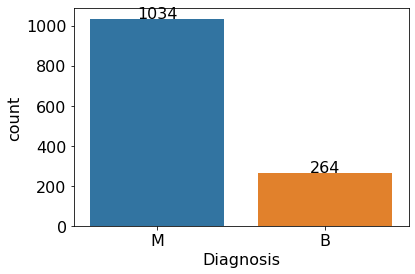

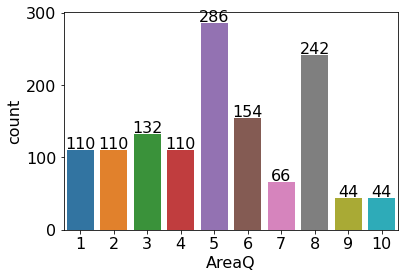

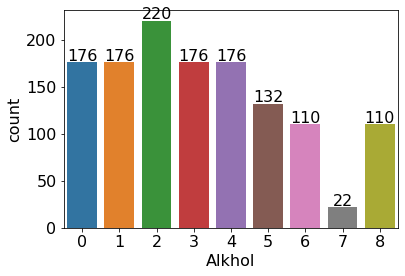

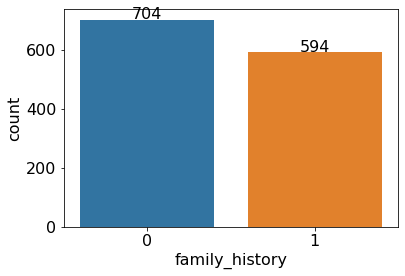

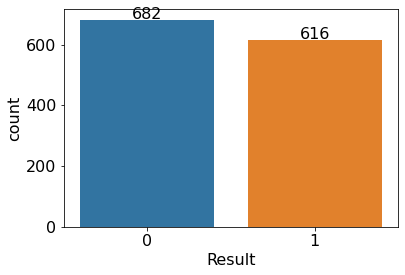

In [214]:
#checking the variance (different values of count ) in categorical variable
for x in ['Diagnosis','AreaQ','Alkhol','family_history','Result']:
    ax=sns.countplot(x,data=lung_cancer_cat)
    for p in ax.patches:
        height = p.get_height()
        ax.text(x = p.get_x()+(p.get_width()/2),y = height+2.0, s = '{:.0f}'.format(height),ha = 'center')
    plt.show()

### Bivariate Analysis on Categorical Datasets

In [215]:
lung_cancer_cat.head()

,Name,Diagnosis,Smokes_years,Smokes_packs_per_year,AreaQ,Alkhol,family_history,Result
0,Wick,M,0.0,0.0,5,4,0,1
1,Constantine,M,0.0,0.0,2,5,0,1
2,Anderson,M,0.0,0.0,5,2,0,0
3,Telles,M,37.0,37.0,8,1,1,0
4,Maradona,M,0.0,0.0,5,6,0,1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


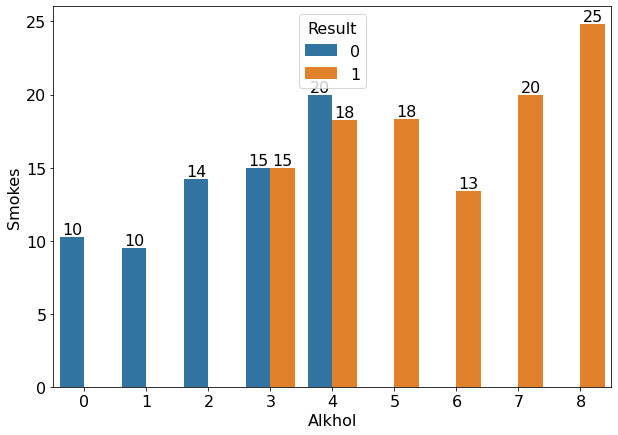

In [216]:
#Showing the result between Alkhol and Smokes and having cancer.
plt.figure(figsize=(10,7))
ax=sns.barplot(x="Alkhol", y="Smokes", data=lung_cancer,hue="Result",ci=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height+0.2, s = '{:.0f}'.format(height),ha = 'center')
plt.show()

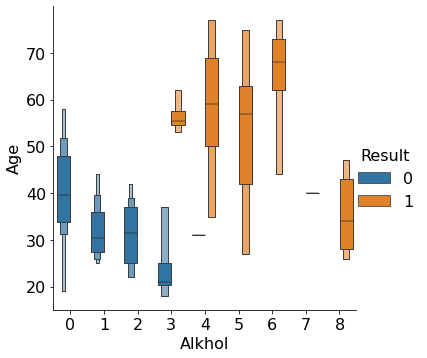

In [217]:
#Showing alchol user members belongs to which categories and having cancer.
sns.catplot(data=lung_cancer,x='Alkhol',y='Age',hue='Result',kind='boxen')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '0.0'),
  Text(1, 0, '37.0'),
  Text(2, 0, '3.4'),
  Text(3, 0, '2.8'),
  Text(4, 0, '0.04'),
  Text(5, 0, '0.51'),
  Text(6, 0, '2.4'),
  Text(7, 0, '6.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '1.6')])

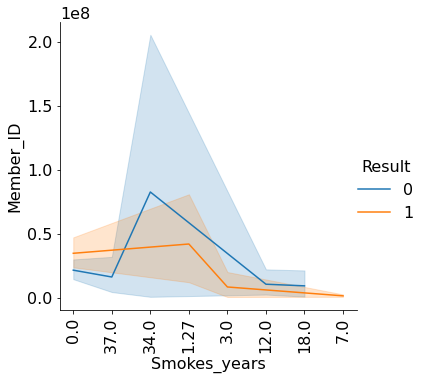

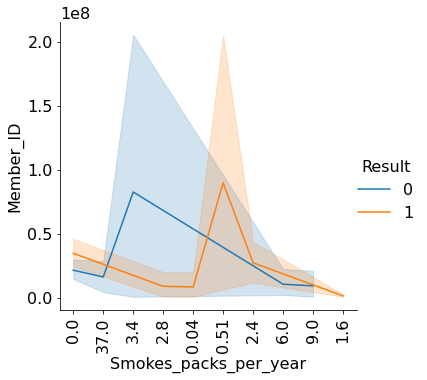

In [218]:
#No. of member id showing smoking years.
sns.relplot(x="Smokes_years", y="Member_ID",hue='Result', kind="line", data=lung_cancer_new)
plt.xticks(rotation=90)
sns.relplot(x="Smokes_packs_per_year", y="Member_ID",hue='Result', kind="line", data=lung_cancer_new)
plt.xticks(rotation=90)

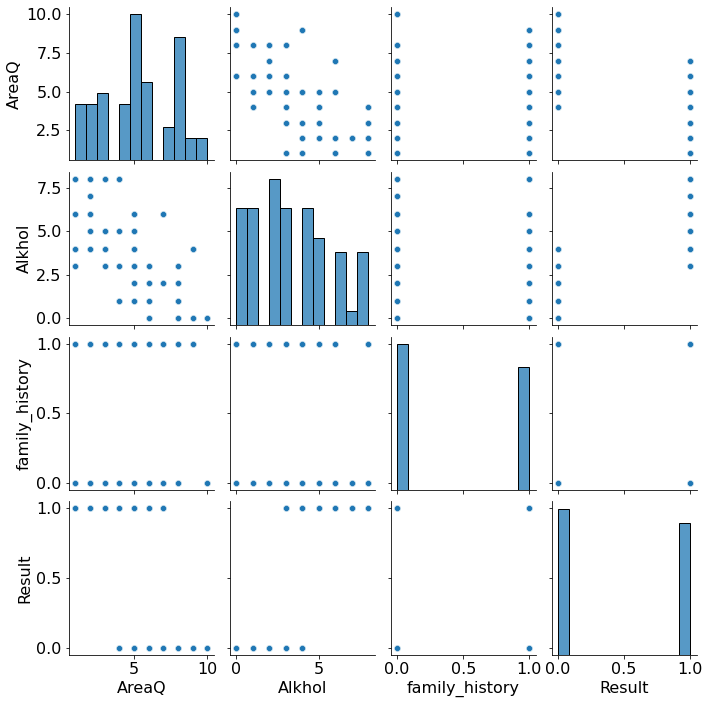

In [219]:
#checking relation between different features to each others.
sns.pairplot(data=lung_cancer_cat)
plt.show()